#Assignment 3
ebrassar  
tziljlstr

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import requests
from bs4 import BeautifulSoup


In [ ]:
#Collecting Global Coca-Cola Prices in USD
url = "https://www.globalproductprices.com/rankings/coca_cola_price/"
r = requests.get(url)
Page = BeautifulSoup(r.text, 'html.parser')
Page

<!DOCTYPE html>

<html lang="en" xml:lang="en" xmlns="https://www.w3.org/1999/xhtml">
<head>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0" name="viewport"/>
<link href="https://www.globalproductprices.com/rankings/coca_cola_price/" rel="canonical"/>
<link href="https://www.globalproductprices.com/rankings/coca_cola_price/" hreflang="en" rel="alternate"/>
<link href="https://es.globalproductprices.com/rankings/coca_cola_price/" hreflang="es" rel="alternate"/>
<link href="https://de.globalproductprices.com/rankings/coca_cola_price/" hreflang="de" rel="alternate"/>
<link href="https://pt.globalproductprices.com/rankings/coca_cola_price/" hreflang="pt" rel="alternate"/>
<link href="https://ru.globalproductprices.com/rankings/coca_cola_price/" hreflang="ru" rel="alternate"/>
<link href="https://bg.globalproductprices.com/rankings/coca_cola_price/" hreflang="bg" rel="alternate"/>
<link href="https://fr.globalproductprices.com/rankings/coca_cola_price/"

In [ ]:
Table_C = Page.find("table")
from IPython.core.display import display, HTML
display(HTML(str(Table_C)))

Countries,"Coca-Cola prices, 0.5 liter",Rank
Denmark,2.48,1
New Zealand,2.46,2
Finland,2.38,3
UK,2.33,4
Australia,2.23,5
Norway,2.21,6
Ireland,2.18,7
Israel,2.15,8
Sweden,1.81,9
Austria,1.73,10


In [ ]:
import pandas as pd
def scrape_table(table8):
    df = pd.read_html(str(table8))
    df = pd.DataFrame(df[0])
    return Table.from_df(df)

Coca_Cola_Python = scrape_table(Table_C).where("Rank", are.below(12))

# Showing 10 distinct countries worth of data including Canada
Coca_Cola_Python.show(11)

Countries,"Coca-Cola prices, 0.5 liter",Rank
Denmark,2.48,1
New Zealand,2.46,2
Finland,2.38,3
UK,2.33,4
Australia,2.23,5
Norway,2.21,6
Ireland,2.18,7
Israel,2.15,8
Sweden,1.81,9
Austria,1.73,10


In [ ]:
# Importing External Factor Data
url1 = "https://wisevoter.com/country-rankings/gdp-by-country/"
r1 = requests.get(url1)
Page1 = BeautifulSoup(r1.text, 'html.parser')
Page1

<!DOCTYPE html>
<html class="no-js" lang="en-US"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><link href="https://gmpg.org/xfn/11" rel="profile"/><meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"><title>GDP by Country 2023 - Wisevoter</title><link href="https://wisevoter.com/country-rankings/gdp-by-country/" rel="canonical"><meta content="en_US" property="og:locale"><meta content="article" property="og:type"/><meta content="GDP by Country 2023 - Wisevoter" property="og:title"/><meta content="Gross Domestic Product (GDP) is a measure of the total economic output of a country. It is the sum of all the goods and services produced within a country over a given period. The GDP of a country is an important indicator of its economic health and can be used to compare the economic performance […]" property="og:description"/><meta content="https://wisevoter.com/country-rankings/gdp-by-

In [ ]:
Table_1 = Page1.findAll("table")[0]
from IPython.core.display import display, HTML
display(HTML(str(Table_1)))

#,Country,GDP,GDP Growth,GDP per capita
1,United States of America,23.3 trillion,3.7%,"$70,248.63"
2,People's Republic of China,17.7 trillion,4.4%,"$12,556.33"
3,Japan,4.9 trillion,2.4%,"$39,312.66"
4,Germany,4.3 trillion,2.1%,"$51,203.55"
5,India,3.2 trillion,8.2%,"$2,256.59"
6,United Kingdom,3.1 trillion,3.7%,"$46,510.28"
7,France,3 trillion,2.9%,"$43,658.98"
8,Italy,2.1 trillion,2.3%,"$35,657.5"
9,Canada,2 trillion,3.9%,"$51,987.94"
10,South Korea,1.8 trillion,2.5%,"$34,997.78"


In [ ]:
# External Factors put into Python table
GDP_table = scrape_table(Table_1)
GDP_table

#,Country,GDP,GDP Growth,GDP per capita
1,United States of America,23.3 trillion,3.7%,"$70,248.63"
2,People's Republic of China,17.7 trillion,4.4%,"$12,556.33"
3,Japan,4.9 trillion,2.4%,"$39,312.66"
4,Germany,4.3 trillion,2.1%,"$51,203.55"
5,India,3.2 trillion,8.2%,"$2,256.59"
6,United Kingdom,3.1 trillion,3.7%,"$46,510.28"
7,France,3 trillion,2.9%,"$43,658.98"
8,Italy,2.1 trillion,2.3%,"$35,657.5"
9,Canada,2 trillion,3.9%,"$51,987.94"
10,South Korea,1.8 trillion,2.5%,"$34,997.78"


In [ ]:
#Scarpping for Currency code data for each nation
urlo = "https://divercitytimes.com/economy/currency/currency"
r4 = requests.get(urlo)
Page_Code = BeautifulSoup(r4.text, 'html.parser')
Page_Code

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>List of Currency Codes by Country - divercitytimes.com</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="List of Countries Currency List 2021,with the latest result  and value in their country" name="description"/>
<!-- Favicon -->
<link href="../../img/weblogo.png" rel="icon"/>
<link href="https://divercitytimes.com/economy/currency/currency" rel="canonical"/>
<!-- Google Fonts -->
<link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/4.6.0/css/bootstrap.min.css" rel="stylesheet"/>
<link href="../../css/style.css" rel="stylesheet"/>
<link href="https://cdn.datatables.net/1.11.1/css/jquery.dataTables.min.css" rel="stylesheet"/>
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.4.1/jquery.min.js"></script>
<script src="https://cdn.d

In [ ]:
Table_o = Page_Code.findAll("table")[0]
from IPython.core.display import display, HTML
display(HTML(str(Table_o)))

No.,Country/Territory,Currency,Symbol,Code,Unit,Basic
1,Afghanistan,Afghan afghani,Af or Afs (pl.),AFN,Pul,100
2,Albania,Albanian lek,Lek,ALL,Qintar,100
3,Algeria,Algerian dinar,DA,DZD,Santeem,100
4,Andorra,Euro,€,EUR,Cent,100
5,Angola,Angolan kwanza,Kz,AOA,Cêntimo,100
6,Anguilla,Eastern Caribbean dollar,$,XCD,Cent,100
7,Antigua and Barbuda,Eastern Caribbean dollar,$,XCD,Cent,100
8,Argentina,Argentine peso,$,ARS,Centavo,100
9,Armenia,Armenian dram,֏,AMD,Luma,100
10,Aruba,Aruban florin,ƒ,AWG,Cent,100


In [ ]:
# Filtering to join table later to show each selected countries currency code
Codes = scrape_table(Table_o).drop("Currency", "Symbol", "Unit", "Basic", "No.")
Codes

Country/Territory,Code
Afghanistan,AFN
Albania,ALL
Algeria,DZD
Andorra,EUR
Angola,AOA
Anguilla,XCD
Antigua and Barbuda,XCD
Argentina,ARS
Armenia,AMD
Aruba,AWG


In [ ]:
# Initially combining Coca-Cola data with external factor data
Combined = Coca_Cola_Python.join("Countries", GDP_table,"Country").drop("#", "GDP").sort("Rank").relabel("Coca-Cola prices, 0.5 liter", "Coca-Cola prices, 0.5 liter($USD)")
Combined

Countries,"Coca-Cola prices, 0.5 liter($USD)",Rank,GDP Growth,GDP per capita
Denmark,2.48,1,2.3%,"$68,007.76"
New Zealand,2.46,2,2.7%,"$48,781.03"
Finland,2.38,3,1.6%,"$53,654.75"
Australia,2.23,5,4.2%,"$60,443.11"
Norway,2.21,6,4%,"$89,154.28"
Ireland,2.18,7,5.2%,"$100,172.1"
Israel,2.15,8,5%,"$52,170.71"
Sweden,1.81,9,2.9%,"$61,028.74"
Austria,1.73,10,2.6%,"$53,637.71"
Canada,1.67,11,3.9%,"$51,987.94"


In [ ]:
# Exchange rate November 30th 1.36 for USD-> CAD
#Creating a column that converts 10 nations USD denominated price to CAD price
CAD_Conversion = Combined.column("Coca-Cola prices, 0.5 liter($USD)")* 1.36
Combined_Conversion = Combined.with_columns("Coca-Cola prices, 0.5 liter ($CAD)", CAD_Conversion)
Combined_Conversion

Countries,"Coca-Cola prices, 0.5 liter($USD)",Rank,GDP Growth,GDP per capita,"Coca-Cola prices, 0.5 liter ($CAD)"
Denmark,2.48,1,2.3%,"$68,007.76",3.3728
New Zealand,2.46,2,2.7%,"$48,781.03",3.3456
Finland,2.38,3,1.6%,"$53,654.75",3.2368
Australia,2.23,5,4.2%,"$60,443.11",3.0328
Norway,2.21,6,4%,"$89,154.28",3.0056
Ireland,2.18,7,5.2%,"$100,172.1",2.9648
Israel,2.15,8,5%,"$52,170.71",2.924
Sweden,1.81,9,2.9%,"$61,028.74",2.4616
Austria,1.73,10,2.6%,"$53,637.71",2.3528
Canada,1.67,11,3.9%,"$51,987.94",2.2712


In [ ]:
## Exchange rate November 30th
# USD -> DEN 6.85 Danish Krone
# USD -> NZ 1.62 New Zealand Dollar
# USD -> FIN 0.92 Euro
# USD -> NOR 10.79 Norwegian Krone
# USD -> AUS 1.51 Australian Dollar
# USD  ->IRL 0.92 Euro
# USD ->ISR 3.72 Israeli New Shekel
# USD -> SWD 10.52 Swedish Krona
# USD->AUST 0.92 Euro
# USD->CAD 1.36 CAD Dollar

In [ ]:
# Based on exchange rates aboveadding new column to the table with local denominated prices
Local_Prices = make_array(2.5*6.85,
                          2.46* 1.62,
                          2.38*0.92,
                          2.23*10.79,
                          2.21* 1.51,
                          2.18*0.92,
                          2.15*3.72,
                          1.81* 10.52,
                          1.73*0.92,
                          1.67*1.36)
Combined_Conversion2 = Combined_Conversion.with_columns("Coca-Cola prices, 0.5 liter (Local)", Local_Prices)
Combined_Conversion2

Countries,"Coca-Cola prices, 0.5 liter($USD)",Rank,GDP Growth,GDP per capita,"Coca-Cola prices, 0.5 liter ($CAD)","Coca-Cola prices, 0.5 liter (Local)"
Denmark,2.48,1,2.3%,"$68,007.76",3.3728,17.125
New Zealand,2.46,2,2.7%,"$48,781.03",3.3456,3.9852
Finland,2.38,3,1.6%,"$53,654.75",3.2368,2.1896
Australia,2.23,5,4.2%,"$60,443.11",3.0328,24.0617
Norway,2.21,6,4%,"$89,154.28",3.0056,3.3371
Ireland,2.18,7,5.2%,"$100,172.1",2.9648,2.0056
Israel,2.15,8,5%,"$52,170.71",2.924,7.998
Sweden,1.81,9,2.9%,"$61,028.74",2.4616,19.0412
Austria,1.73,10,2.6%,"$53,637.71",2.3528,1.5916
Canada,1.67,11,3.9%,"$51,987.94",2.2712,2.2712


In [ ]:
# Now, joining currency code table to show local price in local currency
# Additionally converted 'Coca-Cola prices, 0.5 liter ($CAD)' to a float to use in scatter and bar chart later
Combined_Conversion3 = Combined_Conversion2.join("Countries", Codes,"Country/Territory").drop("Rank", "GDP Growth")
Combined_Conversion3= Combined_Conversion_VF.append_column('Coca-Cola prices, 0.5 liter ($CAD)', Combined_Conversion_VF.apply(lambda n : float(n), 'Coca-Cola prices, 0.5 liter ($CAD)'))
Combined_Conversion3

Countries,"Coca-Cola prices, 0.5 liter($USD)",GDP per capita,"Coca-Cola prices, 0.5 liter ($CAD)","Coca-Cola prices, 0.5 liter (Local)",Code
Australia,2.23,"$60,443.11",3.0328,24.0617,AUD
Austria,1.73,"$53,637.71",2.3528,1.5916,EUR
Canada,1.67,"$51,987.94",2.2712,2.2712,CAD
Denmark,2.48,"$68,007.76",3.3728,17.125,DKK
Finland,2.38,"$53,654.75",3.2368,2.1896,EUR
Ireland,2.18,"$100,172.1",2.9648,2.0056,EUR
Israel,2.15,"$52,170.71",2.924,7.998,ILS
New Zealand,2.46,"$48,781.03",3.3456,3.9852,NZD
Norway,2.21,"$89,154.28",3.0056,3.3371,NOK
Sweden,1.81,"$61,028.74",2.4616,19.0412,SEK


In [ ]:
# In order to use my external factor later in scatter and bar chart made into an array and then removed the "$"
# Then also had to remove the comma from the second element of each sublist created after the split, so the part after the dollar sign and replaced with nothing
# All while converting the string after remvoing the "$" and "," to a float
GDP_capita = Combined_Conversion3.column("GDP per capita")
split_GDP_capita = [item.split('$') for item in GDP_capita]
numerical_GDP_capita = [float(item[1].replace(',', '')) for item in split_GDP_capita]

Combined_Conversion4 = Combined_Conversion3.with_columns("GDP per capita",numerical_GDP_capita).relabel("GDP per capita","GDP per capita($)")
Combined_Conversion4

Countries,"Coca-Cola prices, 0.5 liter($USD)",GDP per capita($),"Coca-Cola prices, 0.5 liter ($CAD)","Coca-Cola prices, 0.5 liter (Local)",Code
Australia,2.23,60443.1,3.0328,24.0617,AUD
Austria,1.73,53637.7,2.3528,1.5916,EUR
Canada,1.67,51987.9,2.2712,2.2712,CAD
Denmark,2.48,68007.8,3.3728,17.125,DKK
Finland,2.38,53654.8,3.2368,2.1896,EUR
Ireland,2.18,100172,2.9648,2.0056,EUR
Israel,2.15,52170.7,2.924,7.998,ILS
New Zealand,2.46,48781,3.3456,3.9852,NZD
Norway,2.21,89154.3,3.0056,3.3371,NOK
Sweden,1.81,61028.7,2.4616,19.0412,SEK


In [ ]:
#Made an array based on knwoing what the CAD Coca_cola price was in order to compare different country prices to Canada
CAD_Price = make_array(2.2712,
                          2.2712,
                          2.2712,
                          2.2712,
                          2.2712,
                          2.2712,
                          2.2712,
                          2.2712,
                          2.2712,
                          2.2712)
Combined_Conversion_VF = Combined_Conversion4.with_columns("CAD Price",CAD_Price)
Combined_Conversion_VF

Countries,"Coca-Cola prices, 0.5 liter($USD)",GDP per capita($),"Coca-Cola prices, 0.5 liter ($CAD)","Coca-Cola prices, 0.5 liter (Local)",Code,CAD Price
Australia,2.23,60443.1,3.0328,24.0617,AUD,2.2712
Austria,1.73,53637.7,2.3528,1.5916,EUR,2.2712
Canada,1.67,51987.9,2.2712,2.2712,CAD,2.2712
Denmark,2.48,68007.8,3.3728,17.125,DKK,2.2712
Finland,2.38,53654.8,3.2368,2.1896,EUR,2.2712
Ireland,2.18,100172,2.9648,2.0056,EUR,2.2712
Israel,2.15,52170.7,2.924,7.998,ILS,2.2712
New Zealand,2.46,48781,3.3456,3.9852,NZD,2.2712
Norway,2.21,89154.3,3.0056,3.3371,NOK,2.2712
Sweden,1.81,61028.7,2.4616,19.0412,SEK,2.2712


In [ ]:
#Removed useless data in order to make bar chart
Combined_Conversion_bar = Combined_Conversion_VF.drop("Coca-Cola prices, 0.5 liter($USD)", "GDP per capita($)","Coca-Cola prices, 0.5 liter (Local)", "Code")
Combined_Conversion_bar

Countries,"Coca-Cola prices, 0.5 liter ($CAD)",CAD Price
Australia,3.0328,2.2712
Austria,2.3528,2.2712
Canada,2.2712,2.2712
Denmark,3.3728,2.2712
Finland,3.2368,2.2712
Ireland,2.9648,2.2712
Israel,2.924,2.2712
New Zealand,3.3456,2.2712
Norway,3.0056,2.2712
Sweden,2.4616,2.2712


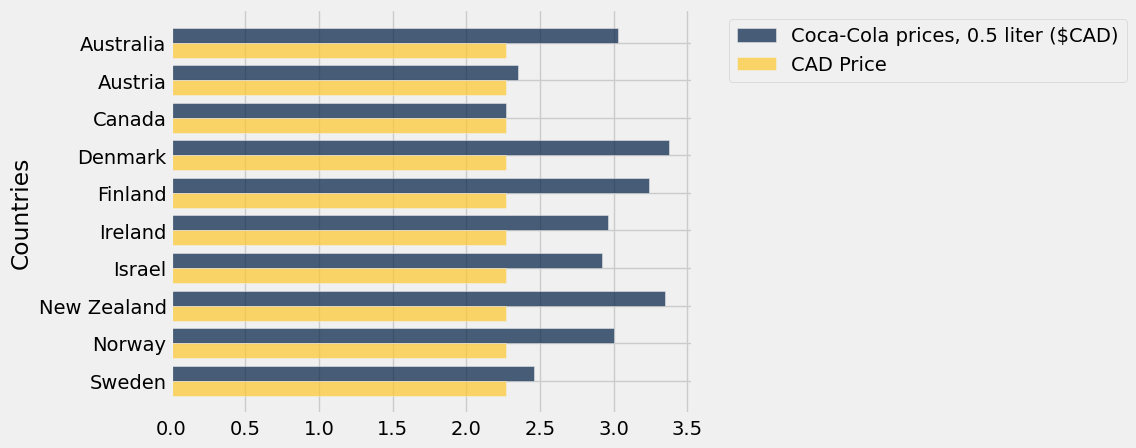

In [ ]:
Combined_Conversion_bar.barh("Countries")

[[ 1.         -0.22407153]
 [-0.22407153  1.        ]]


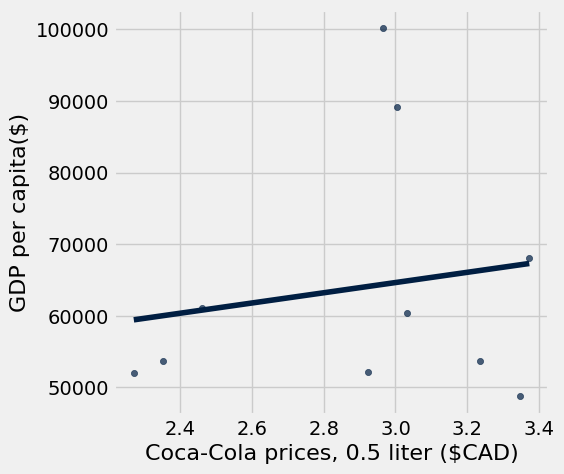

In [ ]:
#Proves GDP per capita has no correlation with Coca-Cola prices, Correlation = -0.22407153
#For Coca Cola, the company provides the syrup and the bottling plants are typically owned locally.
#So there is a licensing agreement for the production and distribution.
#Outside of royalties and purchase of syrup, all other decisions and costs are related to the domestic economy.
#Initially believed a healthier economy would translate to a healthier currency, and thus lowering the price relatively as wouldn't have to pay as much for input costs and transportation costs
Combined_Conversion_VF.scatter("Coca-Cola prices, 0.5 liter ($CAD)", "GDP per capita($)", fit_line=True)
Corr= np.corrcoef(numerical_GDP_capita, CAD_Conversion )
print(Corr)